In [1]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import librosa
audio_data = 'test.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>


In [3]:
librosa.load(audio_data, sr=44100)

(array([0.00787354, 0.00773621, 0.00758362, ..., 0.00874329, 0.0092926 ,
        0.00828552], dtype=float32), 44100)

In [4]:
librosa.load(audio_data, sr=None)

(array([0.00787354, 0.00773621, 0.00758362, ..., 0.00874329, 0.0092926 ,
        0.00828552], dtype=float32), 44100)

In [5]:
import IPython.display as ipd
ipd.Audio(audio_data)

Visualising Audio

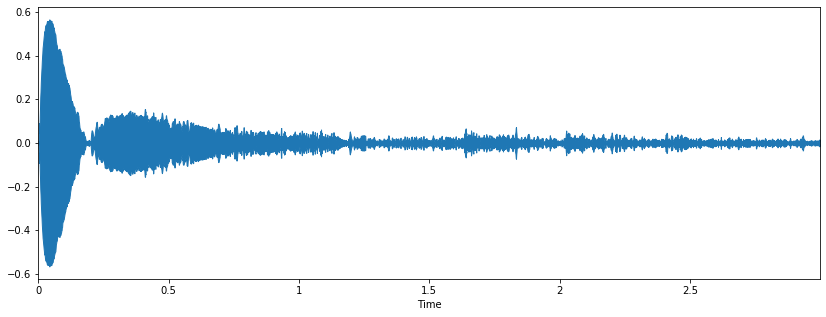

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Spectrogram
 
A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

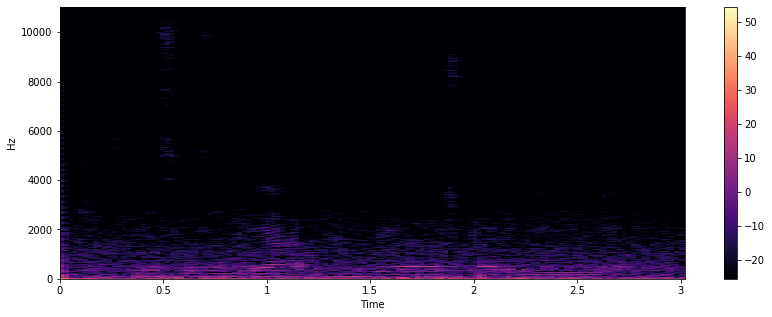

In [7]:
X = librosa.stft(x) #short term fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

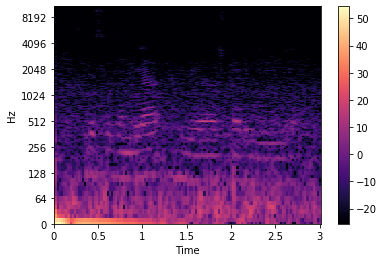

In [8]:
#convert the frequency axis to a logarithmic one
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Create an Audio Signal

In [9]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
librosa.output.write_wav('tone_220.wav', x, sr)
